# Summary

This notebook presents an exploratory analysis of a sales dataset with the goal of identifying patterns and trends that help better understand customer behavior and product performance. The analysis aims to answer key questions such as which products are the best sellers, which ones generate the most revenue, what gender and age range are most active among buyers, and during which dates sales tend to peak. To guide this process, the following data analysis steps will be applied: ask, prepare, process, analyze, share, and act. These steps will help extract valuable insights to support strategic decision-making in the commercial domain.

# Ask Phase

This analysis aims to understand customer behavior and product performance based on sales data. To guide the exploration, the following key questions are considered:

1. Which products are the best sellers?
2. Which products generate the most revenue?
3. Which gender purchases more frequently?
4. What age range buys the most?
5. During which dates or periods are sales the highest?
6. Are there differences in the types of products purchased based on gender or age?

# Prepare Phase

## About the data

The dataset used for this analysis is publicly available on [Kaggle](https://www.kaggle.com/datasets/sahilislam007/sales-dataset). It contains a total of 1,000 rows and 8 columns, with information corresponding to the year 2023. The data includes relevant variables related to sales, such as products, prices, quantities, dates, and customer demographics. Before starting the analysis, the quality and relevance of the dataset will be evaluated using the ROCCC criteria (Reliable, Original, Comprehensive, Current, Cited), which help ensure that the data is trustworthy, original, complete, up-to-date, and properly cited.

* Reliable: Dataset published on Kaggle by user sahilislam007, a well-known platform in data science.
* Original: The original source is not specified; it appears to be created by the author.
* Comprehensive: Contains 8 columns and 1,000 rows with data relevant for sales analysis.
* Current: Data corresponds to the year 2023.
* Cited: No references or citations are included with the dataset.

This project does not necessarily meet all the established criteria for data quality and validity; however, it serves as an interesting and useful dataset for conducting exploratory data analysis, allowing the practice and application of techniques to better understand sales and customer behavior.

## Data

The dataset contains 1,000 rows and 8 columns. Below is a summary of the key variables used in the analysis.

| Column Name       | Description                                      |
|-------------------|------------------------------------------------|
| Date              | Date of the transaction.                        |
| Gender            | Gender of the customer.                         |
| Age               | Age of the customer at the time of purchase.   |
| Product Category  | Category of the purchased item (e.g., Beauty, Clothing, Electronics). |
| Quantity          | Number of units purchased in the transaction.  |
| Price per Unit    | Cost of one item in the selected category.     |
| Total Amount      | Total amount spent (Quantity × Price per Unit).|

All columns will be used in this analysis as they contain relevant information.

# Process Phase

In this processing phase, data cleaning and preparation will be carried out to ensure data quality and consistency. This includes identifying and handling missing values, correcting errors, normalizing formats, and validating data types for each column. Additionally, the characteristics and transformations applied to the variables will be documented using techniques such as outlier detection, duplicate analysis, and date format conversion, to ensure the data is ready for subsequent analysis.

## Data Inspection

The initial inspection of the data is performed using the following code, which helps identify data types, check for null values, and get an overview of the dataset’s structure.

In [1]:
# Libraries & datasets
import pandas as pd
sales = pd.read_csv("/kaggle/input/sales-dataset/Sales Dataset.csv")
# First few rows
sales.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


In [2]:
#structure
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


We can see that there are no nulls and that the date column is not in the correct format.

In [3]:
# Unique values
sales.nunique()

Unnamed: 0          1000
Date                 345
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [4]:
# statistics
sales.describe()

,Unnamed: 0,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,0.000000,18.00000,1.000000,25.000000,25.000000
25%,249.750000,29.00000,1.000000,30.000000,60.000000
50%,499.500000,42.00000,3.000000,50.000000,135.000000
75%,749.250000,53.00000,4.000000,300.000000,900.000000
max,999.000000,64.00000,4.000000,500.000000,2000.000000


## Data cleaning process

The following section outlines the process for cleaning the dataset to ensure it is ready for analysis.

In [5]:
# Don't need the first column
sales = sales.drop('Unnamed: 0', axis = 1)
# Transform date format
sales['Date'] = pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB


In [6]:
# Duplicated values
sales.duplicated().sum()

0

In [7]:
# Segment the ages
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']
sales['Age'] = pd.cut(sales['Age'],bins = bins, labels = labels, right = True)
sales.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,26-35,Beauty,3,50,150
1,2023-02-27,Female,26-35,Clothing,2,500,1000
2,2023-01-13,Male,46-55,Electronics,1,30,30
3,2023-05-21,Male,36-45,Clothing,1,500,500
4,2023-05-06,Male,26-35,Beauty,2,50,100


## Conclusions from data cleaning

After completing the data cleaning steps, the following key changes and observations were made:

* No missing values were found in the dataset.
* No duplicate records were detected.
* The first column was removed, as it only contained entry numbers and no relevant information.
* The Date column was successfully converted from object type to datetime format for better time-based analysis.
* The age variable was segmented into defined age groups to allow for a more structured and meaningful analysis of customer demographics.

# Analyze

In this section, key statistics and patterns within the dataset are explored to gain meaningful insights. The goal is to understand trends in customer behavior, product performance, and sales dynamics through summary metrics.



In [8]:
# About the sales
print("Sales by quantity:")
print(sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False))
print("\nSales by revenue:")
print(sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False))

Sales by quantity:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

Sales by revenue:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


We can see that there is not much difference between the sales of the categories, neither in quantity nor in profits.

In [9]:
# Regarding the dates
sales['Month'] = sales['Date'].dt.month
print("Sales by quantity per month:")
print(sales.groupby('Month')['Quantity'].sum().sort_values(ascending = False))
print("\nSales by revenue per month:")
print(sales.groupby('Month')['Total Amount'].sum().sort_values(ascending = False))
print("\nSales by month and category")
print(sales.groupby(['Month', 'Product Category'])['Quantity'].sum())

Sales by quantity per month:
Month
5     259
10    252
8     227
2     214
4     214
12    207
11    205
1     199
6     197
3     194
7     176
9     170
Name: Quantity, dtype: int64

Sales by revenue per month:
Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64

Sales by month and category
Month  Product Category
1      Beauty               62
       Clothing             72
       Electronics          65
2      Beauty               68
       Clothing             75
       Electronics          71
3      Beauty               51
       Clothing            111
       Electronics          32
4      Beauty               69
       Clothing             93
       Electronics          52
5      Beauty               65
       Clothing             97
       Electronics          97
6      Beauty               66
       Clothing             67
       Electronics      

There is quite a difference in sales between the months. And there are types of products that sell more or less depending on the month.

In [10]:
# By gender 
print("Sales quantity by gender:")
print(sales.groupby('Gender')['Quantity'].sum())
print("\nSales revenue by gender:")
print(sales.groupby('Gender')['Total Amount'].sum())
print("Sales quantity by gender and product category:")
print(sales.groupby(['Gender', 'Product Category'])['Quantity'].sum())

Sales quantity by gender:
Gender
Female    1298
Male      1216
Name: Quantity, dtype: int64

Sales revenue by gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64
Sales quantity by gender and product category:
Gender  Product Category
Female  Beauty              418
        Clothing            441
        Electronics         439
Male    Beauty              353
        Clothing            453
        Electronics         410
Name: Quantity, dtype: int64


We can see that male users have less interest in beauty products.

In [11]:
# By age group
print("Sales quantity by age group:")
print(sales.groupby('Age', observed=False)['Quantity'].sum())
print("\nSales revenue by age group:")
print(sales.groupby('Age', observed=False)['Total Amount'].sum())
print("\nSales quantity by age group and product category:")
print(sales.groupby(['Age', 'Product Category'], observed=False)['Quantity'].sum())

Sales quantity by age group:
Age
18-25    412
26-35    540
36-45    506
46-55    588
56-64    468
Name: Quantity, dtype: int64

Sales revenue by age group:
Age
18-25     84550
26-35     98480
36-45     91870
46-55    100690
56-64     80410
Name: Total Amount, dtype: int64

Sales quantity by age group and product category:
Age    Product Category
18-25  Beauty              152
       Clothing            129
       Electronics         131
26-35  Beauty              177
       Clothing            189
       Electronics         174
36-45  Beauty              135
       Clothing            202
       Electronics         169
46-55  Beauty              180
       Clothing            199
       Electronics         209
56-64  Beauty              127
       Clothing            175
       Electronics         166
Name: Quantity, dtype: int64


There are important differences between the purchasing behaviors of different ages.

In [12]:
# Gender and age
print("Sales quantity by gender and age group:")
print(sales.groupby(['Gender', 'Age'], observed=False)['Quantity'].sum())

Sales quantity by gender and age group:
Gender  Age  
Female  18-25    197
        26-35    287
        36-45    266
        46-55    313
        56-64    235
Male    18-25    215
        26-35    253
        36-45    240
        46-55    275
        56-64    233
Name: Quantity, dtype: int64


There are differences between men and women of different ages.

## Conclusions of the analysis

The following points summarize the key insights obtained from the analysis of the sales dataset. These observations highlight patterns in customer behavior across product categories, time, gender, and age.

* There is not much difference between product categories in terms of quantity sold or total revenue.
* There is a noticeable variation in sales between months.
* Certain types of products sell more or less depending on the month.
* Male customers show significantly less interest in beauty products.
* There are clear differences in purchasing behavior across age groups.
* There are also differences between men and women of different age groups.

# Share

In this section, we will create visualizations to effectively communicate the key insights discovered in the sales dataset. These visual tools will help make the findings clearer and more accessible for stakeholders.

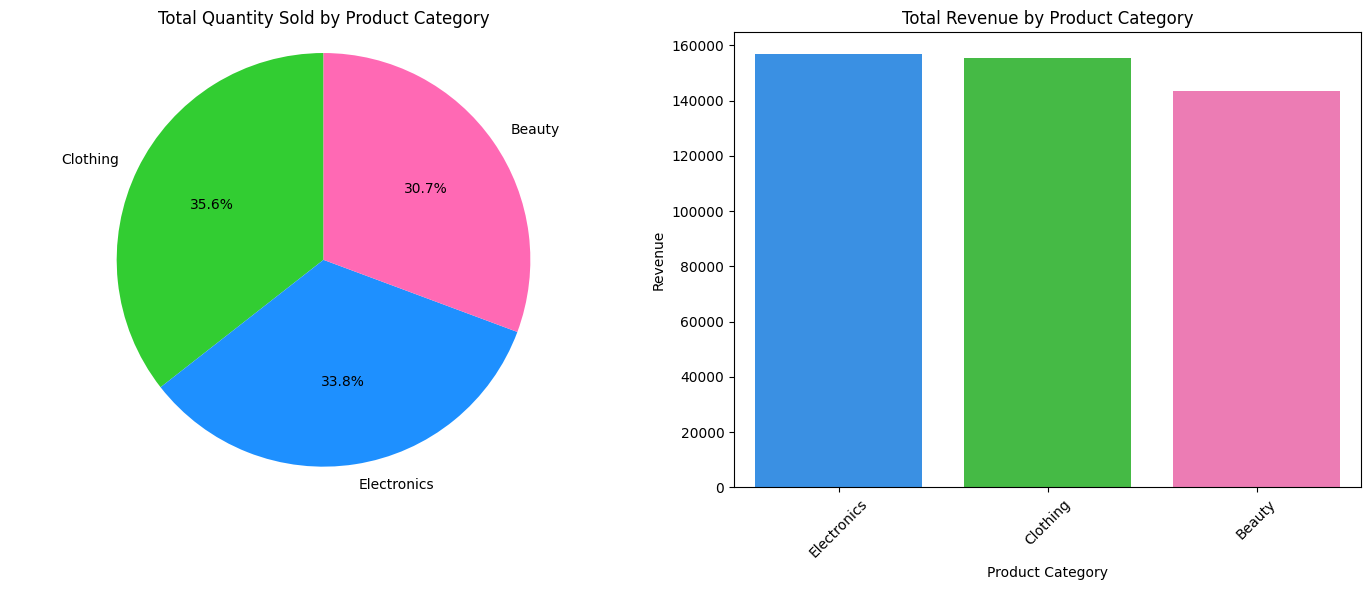

In [13]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# About the sales

colors = {
    'Beauty': '#FF69B4',
    'Clothing': '#32CD32',
    'Electronics': '#1E90FF'
}

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(
    sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False),
    labels=sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[cat] for cat in sales.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).index]
)
plt.title('Total Quantity Sold by Product Category')
plt.axis('equal')

plt.subplot(1, 2, 2)
sns.barplot(
    x=sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).index,
    y=sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).values,
    palette = colors
)
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

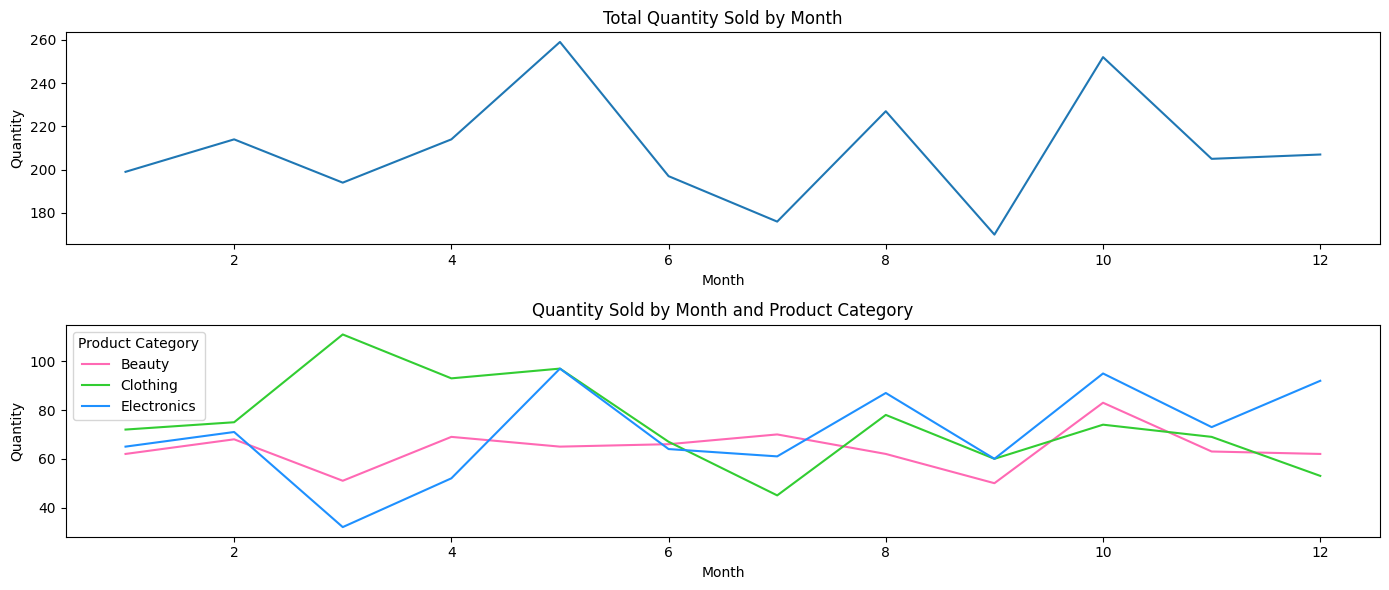

In [14]:
# Regarding the dates

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
sns.lineplot(
    x=sales.groupby('Month')['Quantity'].sum().sort_index().index,
    y=sales.groupby('Month')['Quantity'].sum().sort_index().values
)
plt.title('Total Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.subplot(2, 1, 2)
sns.lineplot(
    data=sales,
    x='Month',
    y='Quantity',
    hue='Product Category',
    estimator='sum',
    errorbar=None,
    palette = colors
)
plt.title('Quantity Sold by Month and Product Category')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()

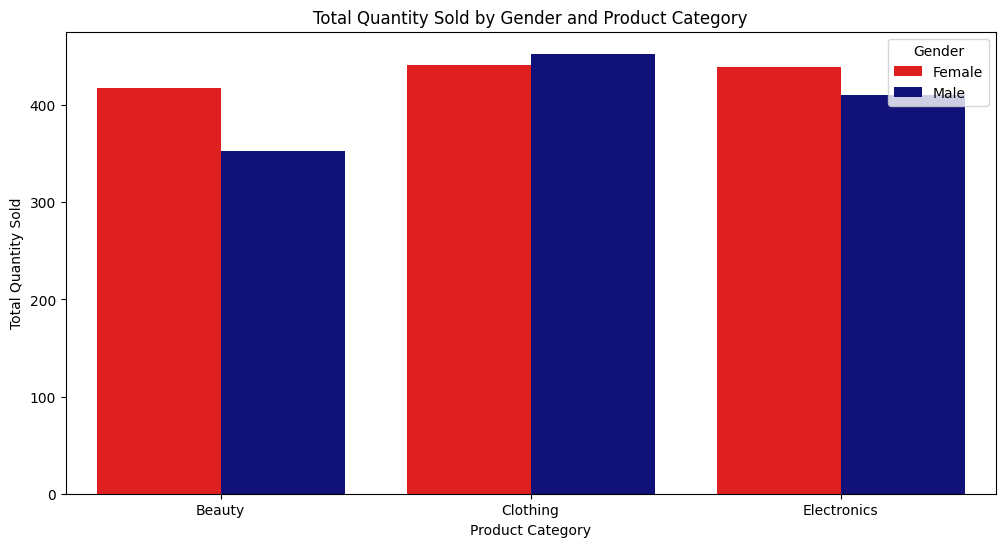

In [15]:
# By gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.barplot(
    data=sales.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index(),
    x='Product Category',
    y='Quantity',
    hue='Gender',
    palette={'Female': 'red', 'Male': 'darkblue'}
)

plt.title('Total Quantity Sold by Gender and Product Category')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Category')
plt.legend(title='Gender')

/tmp/ipykernel_13/3332330417.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=sales.groupby('Age')['Quantity'].sum().reset_index(),
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_13/3332330417.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=sales.groupby(['Age', 'Product Category'])['Qu

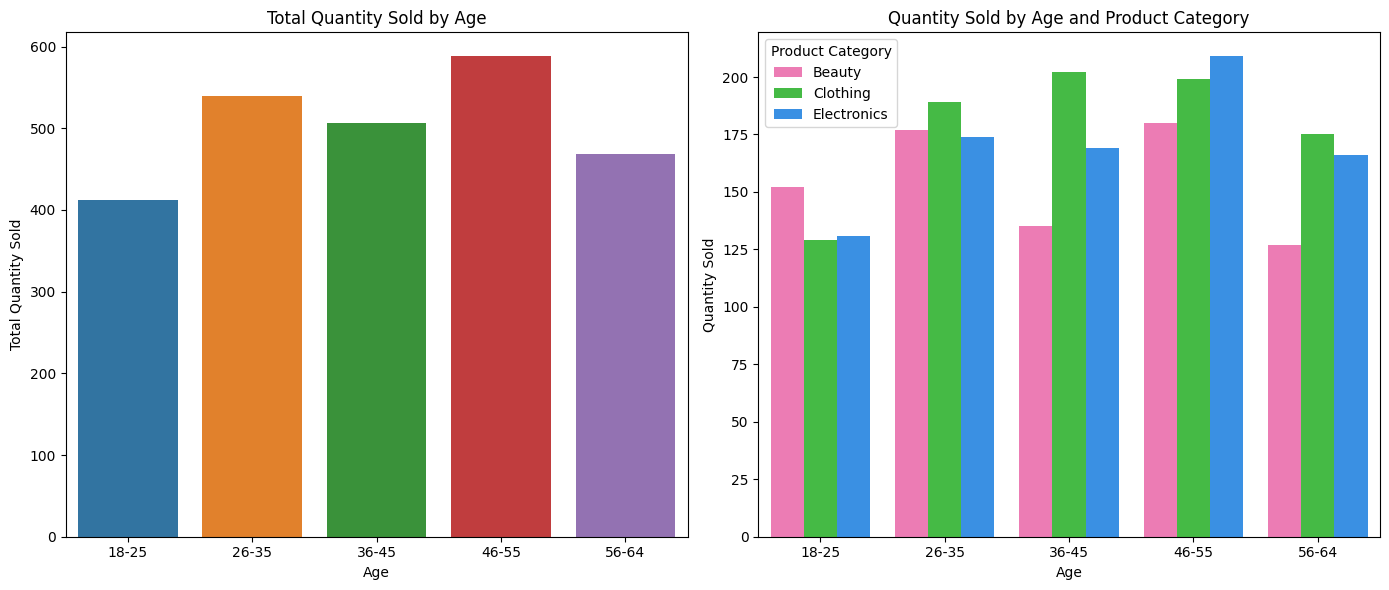

In [16]:
# By age group

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    data=sales.groupby('Age')['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity'
)
plt.title('Total Quantity Sold by Age')
plt.xlabel('Age')
plt.ylabel('Total Quantity Sold')

plt.subplot(1, 2, 2)
sns.barplot(
    data=sales.groupby(['Age', 'Product Category'])['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity',
    hue='Product Category',
    palette = colors
)
plt.title('Quantity Sold by Age and Product Category')
plt.xlabel('Age')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()

# Act

This stage presents strategic recommendations based on the data analysis conducted in the previous phases. The goal is to turn insights into actionable steps that support better decision-making, optimize resources, and enhance business performance. The recommendations are grounded in patterns identified in customer behavior, purchasing trends, and product performance.

The final recommendations are the result of a critical evaluation and are aimed at generating value from the data analyzed.

* While there is no significant difference in total sales across product categories, Electronics generate the highest revenue, whereas Beauty products contribute the least. Therefore, it is advisable to prioritize the promotion and availability of electronics to maximize profits, while evaluating the profitability strategy for beauty products.
* The peak sales periods are in May and October, suggesting these months should be the focus of marketing campaigns and inventory buildup. In contrast, July and September show low sales activity and may benefit from promotional efforts to boost demand.
* During March and April, there was an increase in Clothing sales, while Electronics sales declined. Additionally, Clothing experienced a noticeable drop in sales in July. These trends suggest seasonal preferences that should inform inventory and promotional planning.
* Although men are somewhat less interested in purchasing beauty products, the difference is not very large, indicating a relatively balanced interest in this category across genders.
* The 46–55 age group is the most active in purchasing, while the 18–25 age group buys the least.
* The 36–45 and 56–64 age groups do not buy many beauty products, the 18–25 group purchases little clothing, and the 46–55 group buys the most electronics.